# Locally Weighted Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
# generating data
X = np.linspace(-7.0, 7.0, 500)
y = 2.0 + X**2 + np.random.rand(X.shape[0])
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

data = np.hstack((X, y))
data = np.hstack((np.ones((data.shape[0], 1)), data))
np.random.shuffle(data)

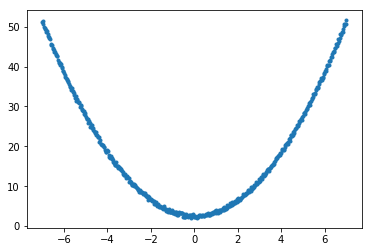

In [3]:
# visualising data
plt.scatter(data[:, 1], data[:, -1], marker = '.')
plt.show()

In [4]:
# train-test-split
split_factor = 0.9
split = int(split_factor*data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))

X_test = data[split: , :-1]
y_test = data[split:, -1].reshape((-1, 1))

print("Number of examples in training set = " + str(X_train.shape[0]))
print("Number of examples in testing set = " + str(X_test.shape[0]))

Number of examples in training set = 450
Number of examples in testing set = 50


In [5]:
def hypothesis(x, theta):
    return np.dot(x, theta)

def gradient(x, y, theta):
    h = hypothesis(x, theta)
    grad = np.dot(x.transpose(), (h - y))
    return grad

def cost(x, y, theta):
    h = hypothesis(x, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J
    
def weight(x, x_test):
    dist = np.linalg.norm(x - x_test)
    t = 0.5
    w = np.exp((-1.0*(dist**2)) / (2.0*(t**2)))
    return w

def plotHypothesis(x, pred, theta):
    x_plot = np.linspace(x[0, 1] - 2, x[0, 1] + 2, 5)
    y_plot = theta[0, 0] + theta[1, 0]*x_plot
    plt.plot(x_plot, y_plot)
    plt.scatter(x[0, 1], pred, color = 'red')
    plt.scatter(X_train[:, 1], y_train, marker = '.')
    plt.show()

def predict(X, y, x_test, u = 0.03):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_itr = 500
    for itr in range(max_itr):
        theta_temp = theta
        for i in range(X.shape[0]):
            x = X[i, :].reshape((1, -1))
            w = weight(x, x_test)
            theta_temp = theta_temp - u*w*gradient(x, y[i], theta_temp)
        theta = theta_temp
        error_list.append(cost(X, y, theta)[0])
    pred = hypothesis(x_test, theta)[0]
    return pred, error_list

In [6]:
# computing y_pred
y_pred = []
for i in range(X_test.shape[0]):
    x_test = X_test[i, :].reshape((1, -1))
    pred, error_list = predict(X_train, y_train, x_test)
    y_pred.append(pred)
    if i % 5 == 0:
        print("y_pred = %.3f"%(pred[0]) + "    y_test = %.3f"%(y_test[i][0]))
y_pred = np.array(y_pred).reshape((-1, 1))

y_pred = 5.400    y_test = 5.093
y_pred = 36.547    y_test = 36.270
y_pred = 18.552    y_test = 17.903
y_pred = 35.282    y_test = 34.665
y_pred = 17.638    y_test = 17.658
y_pred = 31.372    y_test = 30.451
y_pred = 15.667    y_test = 15.014
y_pred = 40.193    y_test = 40.154
y_pred = 10.682    y_test = 10.408
y_pred = 12.436    y_test = 12.189


In [7]:
# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)

Mean absolute error =  0.3404119354474945
